Accuracy: 1.0


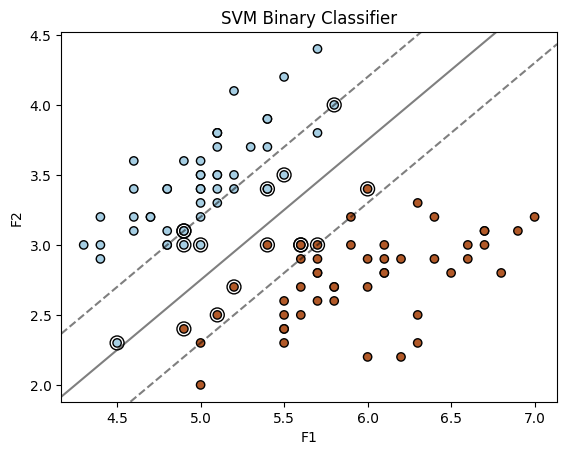

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

X=X[y!=2]
y=y[y!=2]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)
y_pred= svm_classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired,edgecolors='k')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy= np.linspace(ylim[0],ylim[1],30)
YY,XX = np.meshgrid(yy,xx)
xy = np.vstack([XX.ravel(),YY.ravel()]).T
Z=svm_classifier.decision_function(xy).reshape(XX.shape)

ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1], alpha=0.5,linestyles=['--','-','--'])

ax.scatter(svm_classifier.support_vectors_[:,0],svm_classifier.support_vectors_[:,1],
           s=100,linewidth=1,facecolors='none',edgecolors='k')

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('SVM Binary Classifier')
plt.show()